#INTRODUCTION

## PROJECT OVERVIEW

The purpose of this project is to determine the performance of the Beats Powerbeats Pro in the earphones consumer market in comparison to its competitors.

This can be broken down into 2 main questions:

1. How popular are the Beats Powerbeats Pro in comparison to its competitors?
2. What features of the Powerbeats Pro cause consumers to choose it over other earphones?

## BACKGROUND

Founded in 2006 by Dr.Dre and Jimmy Lovine, Beats by Dr. Dre is a leading brand in the audio industry. With its high-end consumer headphones, earphones, and speakers, Beats brings premium sound entertainment to users. In order to provide users with what they want and love, its important to understand what exactly they want and love. This is done through consumer sentiment analysis. Sentiment analysis is the process of determining the emotional tone of a piece of text. This process is essential in the tech industry as product managers and designers can determine how consumers feel about advertisments and products, thus driving future business decisions.

# Data Description

## Data Sources

In order to gather customer reviews on the Beats Powerbeats Pro as well as 14 other competitor earphones that are $50 over or under the price of Powerbeats Pro, I looked to Amazon. Using the Oxylabs API, I extracted 953 total customer reviews.

Here is the raw CSV file of the Amazon reviews: https://drive.google.com/drive/folders/1CQysLZPa9kDtuT4SG7KxKWYaL8288ACu?usp=sharing

Issues: The goal was to extract 1000 reviews, 100 reviews for each product, but this was not possible due to issues with the API. As a result, I decided to add more products to the dataset for a more comprehensive analysis.



In [3]:
import pandas as pd
import numpy as np

Turn the csv file into a dataframe to manipulate

In [4]:
df = pd.read_csv('Merged_Data.csv')
df.head()

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
0,R2W3M98YCJS6TL,B0BJQWYLYN,5.0 out of 5 stars Like-New Performance at a G...,Kurt,5,I recently purchased the Renewed Apple AirPods...,"Reviewed in the United States April 24, 2024",AFLOJ2Q3TJDSVBNLDOCR2L76JBWQ,True,5,Product grade: Renewed
1,R1KJP24LAF02NA,B0BJQWYLYN,5.0 out of 5 stars Like new!,Alejandra Ahumada,5,I recently purchased the refurbished Apple Air...,"Reviewed in the United States June 22, 2023",AGPV7FTN7ISCNEI23RS7XMGT2YZQ,True,36,Product grade: Renewed
2,RZAIZ89G2X3G8,B0BJQWYLYN,5.0 out of 5 stars In This Case Refurbished Ar...,F-Stop Fitzgerald,5,First off there is no difference between a new...,"Reviewed in the United States April 21, 2024",AGFKFVBWSW4W3SDF3542U55CGQYQ,True,8,Product grade: Renewed
3,R24IR2MZ35VQC4,B0BJQWYLYN,5.0 out of 5 stars Beyond amazing! Can’t belie...,Doovakin,5,*BUYER BEWARE: MINE CAME IN THE ORIGINAL BOX A...,"Reviewed in the United States March 11, 2023",AGYSZJ3UE7UC2KEXOZRPDDOG3GKA,True,37,Product grade: Renewed
4,R3OP7FU59NCVM7,B0BJQWYLYN,1.0 out of 5 stars A little disappointed,Amazon customer,1,Well they arrived in about 4 days from orderin...,"Reviewed in the United States January 12, 2023",AE55DAYJJ5GOV3PSHTZSHL7FCAWA,True,85,Product grade: Renewed


## Data Cleaning

It's important to cleanse data by removing null values, duplicates, and outliers.

The only outliers that existed in the dataset were for the helpful_count column, however, those reviews received helpful counts on Amazon due to their rich insights into the products. As a result, these reviews could not be removed from the dataset, as essential insights can be extracted from them.

Additionally, it's important to set values to their appropriate data type to ensure proper conditional checking and data manipulation.

Check if any columns have null values

In [5]:
print(df.isnull().any())

review_id             False
product_id            False
title                 False
author                False
rating                False
content                True
timestamp             False
profile_id            False
is_verified           False
helpful_count         False
product_attributes     True
dtype: bool


Replace null values for default values

In [6]:
df_filled = df.fillna({'content': 'Empty', 'product_attributes' : 'None'})
print(df_filled.isnull().any())

review_id             False
product_id            False
title                 False
author                False
rating                False
content               False
timestamp             False
profile_id            False
is_verified           False
helpful_count         False
product_attributes    False
dtype: bool


Check for duplicate values

In [7]:
print(df_filled.duplicated().any())

False


Convert string types to their appropriate values

In [8]:
df_filled['rating'] = df_filled['rating'].astype(int)
df_filled['helpful_count'] = df_filled['helpful_count'].astype(int)
df_filled['is_verified'] = df_filled['is_verified'].astype(bool)
df_filled

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
0,R2W3M98YCJS6TL,B0BJQWYLYN,5.0 out of 5 stars Like-New Performance at a G...,Kurt,5,I recently purchased the Renewed Apple AirPods...,"Reviewed in the United States April 24, 2024",AFLOJ2Q3TJDSVBNLDOCR2L76JBWQ,True,5,Product grade: Renewed
1,R1KJP24LAF02NA,B0BJQWYLYN,5.0 out of 5 stars Like new!,Alejandra Ahumada,5,I recently purchased the refurbished Apple Air...,"Reviewed in the United States June 22, 2023",AGPV7FTN7ISCNEI23RS7XMGT2YZQ,True,36,Product grade: Renewed
2,RZAIZ89G2X3G8,B0BJQWYLYN,5.0 out of 5 stars In This Case Refurbished Ar...,F-Stop Fitzgerald,5,First off there is no difference between a new...,"Reviewed in the United States April 21, 2024",AGFKFVBWSW4W3SDF3542U55CGQYQ,True,8,Product grade: Renewed
3,R24IR2MZ35VQC4,B0BJQWYLYN,5.0 out of 5 stars Beyond amazing! Can’t belie...,Doovakin,5,*BUYER BEWARE: MINE CAME IN THE ORIGINAL BOX A...,"Reviewed in the United States March 11, 2023",AGYSZJ3UE7UC2KEXOZRPDDOG3GKA,True,37,Product grade: Renewed
4,R3OP7FU59NCVM7,B0BJQWYLYN,1.0 out of 5 stars A little disappointed,Amazon customer,1,Well they arrived in about 4 days from orderin...,"Reviewed in the United States January 12, 2023",AE55DAYJJ5GOV3PSHTZSHL7FCAWA,True,85,Product grade: Renewed
...,...,...,...,...,...,...,...,...,...,...,...
948,R1SL3EFNN1CT5B,B07R5QD598,5.0 out of 5 stars Happy with this purchase,Amazon Customer,5,"Bought these to wear for my commute, walking, ...","Reviewed in the United States July 1, 2024",AFAF5O4DQPM4Y2YCKA65GRZSKREA,True,0,Color: BlackStyle: Powerbeats ProSet: Without ...
949,R1RF62E6KLZPO1,B07R5QD598,4.0 out of 5 stars Hard to put in,Kim,4,These work well and they are definitely constr...,"Reviewed in the United States June 22, 2024",AHAQJ3Y7K22DTPMCY3RXPP44LRZA,True,0,Color: IvoryStyle: Powerbeats ProSet: Without ...
950,R247P4C3C5EEXY,B07R5QD598,4.0 out of 5 stars Excellent Wireless Earbuds ...,Arnold,4,I don't know if Amazon will list how many time...,"Reviewed in the United States February 9, 2024",AEXTQVIKQK72BB6WPCVVUX73H3KQ,True,0,Color: NavyStyle: Powerbeats ProSet: Without A...
951,R1JMOFHE7BHYZZ,B07R5QD598,5.0 out of 5 stars Great Product,Backplate,5,Best Wireless Headphones Out On The Market,"Reviewed in the United States July 13, 2024",AGRDG454JH77PBNLB4I73FHNY3EQ,True,0,Color: BlackStyle: Powerbeats ProSet: With App...


Add column for product names for easier identification and prices

In [9]:
#Find unique product IDs in the dataframe
print(df_filled['product_id'].unique())

#Create dictionary pairing product_id to product_name
names = {'B0BJQWYLYN' : 'Apple Airpods Pro 2nd Gen', 'B08C4KWM9T' : 'Bose QC', 'B0B4PSQHD5' : 'Bose QC 2','B0CGZJDY84' : 'Marshall Motif II',
         'B0BYSSD56Y' : 'SHOKZ OpenFit', 'B09BVYK4J2' : 'SHOKZ OpenRun Pro', 'B0B7QKT986' : 'SHOKZ OpenRun Pro Mini', 'B0CLFXPYPC' : 'Status Between',
         'B09SKMTH5R' : 'Sennheiser CX Plus', 'B09T935X38' : 'Sennheiser MOMENTUM True Wireless 3', 'B0CWH7DVVJ' : 'Cambridge Melomania M100',
         'B08CJCTG6Z' : 'Bose Sport', 'B07X9VG6ZJ' : 'Jabra Elite 75t Earbuds', 'B07R5QD598' : 'Beats Powerbeats Pro'}

prices = {'B0BJQWYLYN' : 180, 'B08C4KWM9T' : 198, 'B0B4PSQHD5' : 179,'B0CGZJDY84' : 170,
         'B0BYSSD56Y' : 180, 'B09BVYK4J2' : 160, 'B0B7QKT986' : 160, 'B0CLFXPYPC' : 179,
         'B09SKMTH5R' : 130, 'B09T935X38' : 145, 'B0CWH7DVVJ' : 169,
         'B08CJCTG6Z' : 200, 'B07X9VG6ZJ' : 150, 'B07R5QD598' : 200}

#Add dictionary to dataframe
df_filled['product_name'] = names
df_filled['price'] = prices

#Since the name dictionary is of a smaller size only 1 row of each product gets a name. Let's fix this.

for key in names.keys():
  df_filled.loc[df_filled.product_id == key, 'product_name'] = names[key]
  df_filled.loc[df_filled.product_id == key, 'price'] = prices[key]

df_filled


['B0BJQWYLYN' 'B08C4KWM9T' 'B0B4PSQHD5' 'B0CGZJDY84' 'B0BYSSD56Y'
 'B09BVYK4J2' 'B0B7QKT986' 'B0CLFXPYPC' 'B09SKMTH5R' 'B09T935X38'
 'B0CWH7DVVJ' 'B08CJCTG6Z' 'B07X9VG6ZJ' 'B07R5QD598']


,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes,product_name,price
0,R2W3M98YCJS6TL,B0BJQWYLYN,5.0 out of 5 stars Like-New Performance at a G...,Kurt,5,I recently purchased the Renewed Apple AirPods...,"Reviewed in the United States April 24, 2024",AFLOJ2Q3TJDSVBNLDOCR2L76JBWQ,True,5,Product grade: Renewed,Apple Airpods Pro 2nd Gen,180.0
1,R1KJP24LAF02NA,B0BJQWYLYN,5.0 out of 5 stars Like new!,Alejandra Ahumada,5,I recently purchased the refurbished Apple Air...,"Reviewed in the United States June 22, 2023",AGPV7FTN7ISCNEI23RS7XMGT2YZQ,True,36,Product grade: Renewed,Apple Airpods Pro 2nd Gen,180.0
2,RZAIZ89G2X3G8,B0BJQWYLYN,5.0 out of 5 stars In This Case Refurbished Ar...,F-Stop Fitzgerald,5,First off there is no difference between a new...,"Reviewed in the United States April 21, 2024",AGFKFVBWSW4W3SDF3542U55CGQYQ,True,8,Product grade: Renewed,Apple Airpods Pro 2nd Gen,180.0
3,R24IR2MZ35VQC4,B0BJQWYLYN,5.0 out of 5 stars Beyond amazing! Can’t belie...,Doovakin,5,*BUYER BEWARE: MINE CAME IN THE ORIGINAL BOX A...,"Reviewed in the United States March 11, 2023",AGYSZJ3UE7UC2KEXOZRPDDOG3GKA,True,37,Product grade: Renewed,Apple Airpods Pro 2nd Gen,180.0
4,R3OP7FU59NCVM7,B0BJQWYLYN,1.0 out of 5 stars A little disappointed,Amazon customer,1,Well they arrived in about 4 days from orderin...,"Reviewed in the United States January 12, 2023",AE55DAYJJ5GOV3PSHTZSHL7FCAWA,True,85,Product grade: Renewed,Apple Airpods Pro 2nd Gen,180.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,R1SL3EFNN1CT5B,B07R5QD598,5.0 out of 5 stars Happy with this purchase,Amazon Customer,5,"Bought these to wear for my commute, walking, ...","Reviewed in the United States July 1, 2024",AFAF5O4DQPM4Y2YCKA65GRZSKREA,True,0,Color: BlackStyle: Powerbeats ProSet: Without ...,Beats Powerbeats Pro,200.0
949,R1RF62E6KLZPO1,B07R5QD598,4.0 out of 5 stars Hard to put in,Kim,4,These work well and they are definitely constr...,"Reviewed in the United States June 22, 2024",AHAQJ3Y7K22DTPMCY3RXPP44LRZA,True,0,Color: IvoryStyle: Powerbeats ProSet: Without ...,Beats Powerbeats Pro,200.0
950,R247P4C3C5EEXY,B07R5QD598,4.0 out of 5 stars Excellent Wireless Earbuds ...,Arnold,4,I don't know if Amazon will list how many time...,"Reviewed in the United States February 9, 2024",AEXTQVIKQK72BB6WPCVVUX73H3KQ,True,0,Color: NavyStyle: Powerbeats ProSet: Without A...,Beats Powerbeats Pro,200.0
951,R1JMOFHE7BHYZZ,B07R5QD598,5.0 out of 5 stars Great Product,Backplate,5,Best Wireless Headphones Out On The Market,"Reviewed in the United States July 13, 2024",AGRDG454JH77PBNLB4I73FHNY3EQ,True,0,Color: BlackStyle: Powerbeats ProSet: With App...,Beats Powerbeats Pro,200.0


# Exploratory Data Analysis (EDA)

## Data Overview

Calculate the mean, median, mode, variance, and standard deviation for the ratings.

In [10]:
#Assign df_filled to df for sake of simplicity
df = df_filled

mean_rating = df['rating'].mean()
median_rating = df['rating'].median()
mode_rating = df['rating'].mode()
variance_rating = df['rating'].var()
std_rating = df['rating'].std()
quantiles_rating = df['rating'].quantile([0.25, 0.5, 0.75])

print("Mean Rating:", mean_rating)
print("Median Rating:", median_rating)
print("Mode Rating:", mode_rating)
print("Variance Rating:", variance_rating)
print("Standard Deviation Rating:", std_rating)
print("Quantiles Rating:", quantiles_rating)


df['rating'].describe()

Mean Rating: 4.166841552990556
Median Rating: 4.0
Mode Rating: 0    5
Name: rating, dtype: int64
Variance Rating: 1.0110002028093505
Standard Deviation Rating: 1.0054850584714576
Quantiles Rating: 0.25    4.0
0.50    4.0
0.75    5.0
Name: rating, dtype: float64


,rating
count,953.000000
mean,4.166842
std,1.005485
min,1.000000
25%,4.000000
50%,4.000000
75%,5.000000
max,5.000000


It's clear that all products in the dataset are popular amongst consumers with the median and mean ratings both being 4 stars.

## Data Visualizations

Let's see how the ratings of the Powerbeats Pro compare to its aggregate competitors

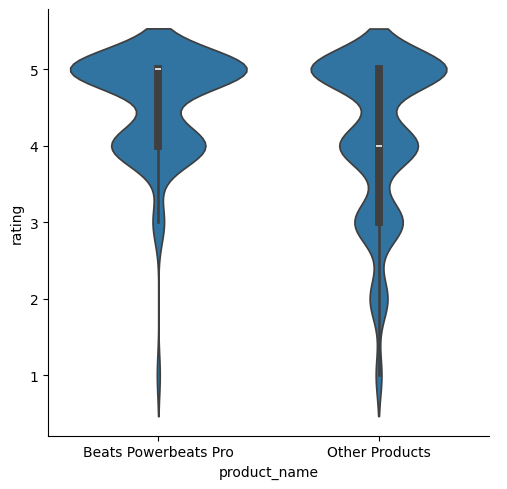

In [11]:
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import seaborn as sns

beats_ratings = df.loc[df.product_name=="Beats Powerbeats Pro", ['product_name', 'rating']]
other_product_ratings = df.loc[df.product_name !="Beats Powerbeats Pro", ['product_name', 'rating']]
other_product_ratings['product_name'] = 'Other Products'
reviews_df = pd.concat([beats_ratings, other_product_ratings], axis=0)
#Let's use a violin plot to compare the distributions
sns.catplot(x = "product_name", y = "rating", kind = 'violin', data = reviews_df)


As we can see, the Beats Powerbeats Pro have a median rating closer to 5 stars compared to other products, and smaller density when approaching 1 star.

Let's also use a pie chart to visualize the distribution of these ratings.

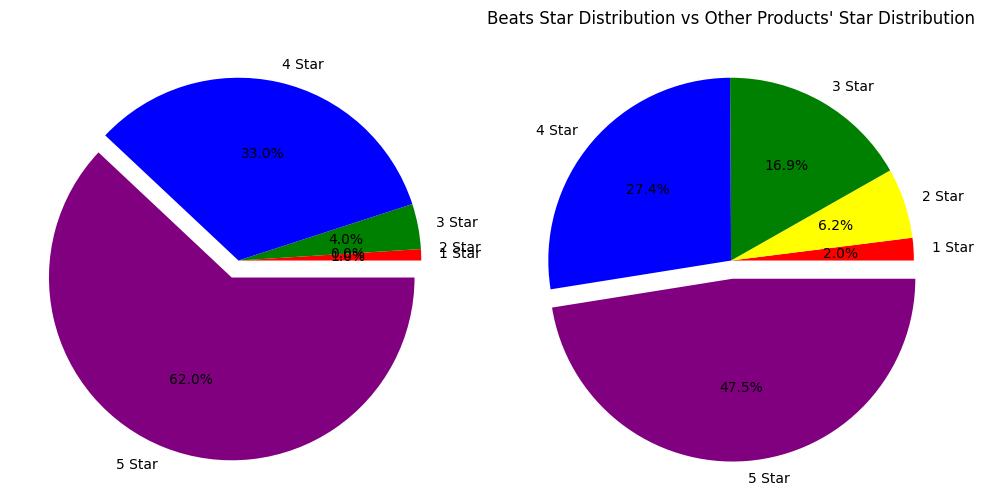

In [12]:
keys = ['1 Star', '2 Star', '3 Star', '4 Star', '5 Star']
beats_star_distribution = []
for i in range(1,6):
  count = len(beats_ratings.loc[beats_ratings.rating == i])
  beats_star_distribution.append(count)

other_star_distribution = []
for i in range(1,6):
  count = len(other_product_ratings.loc[other_product_ratings.rating == i])
  other_star_distribution.append(count)

explode = [0,0,0,0,0.1]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))
plt.title('Beats Star Distribution vs Other Products\' Star Distribution')
axes[0].pie(beats_star_distribution, labels=keys, explode = explode, autopct='%1.1f%%', colors=['red', 'yellow', 'green', 'blue', 'purple'])
axes[1].pie(other_star_distribution, labels=keys, explode = explode, autopct='%1.1f%%', colors=['red', 'yellow', 'green', 'blue', 'purple'])
plt.tight_layout()

62% of the Powerbeats Pro's ratings are 5-stars, while 47.5% of other product's ratings are 5-stars. It's clear that the Powerbeats Pro is excelling in customer popularity in comparison with its competitors.

Let's check out how Beats Powerbeats Pro compares to individual products in terms of ratings. To avoid overcrowding, we can use a bar chart focusing on median ratings.

product_name
Sennheiser MOMENTUM True Wireless 3    3.0
Bose QC                                4.0
Bose QC 2                              4.0
Bose Sport                             4.0
Jabra Elite 75t Earbuds                4.0
Sennheiser CX Plus                     4.5
Status Between                         4.5
Apple Airpods Pro 2nd Gen              5.0
Beats Powerbeats Pro                   5.0
Cambridge Melomania M100               5.0
Marshall Motif II                      5.0
SHOKZ OpenFit                          5.0
SHOKZ OpenRun Pro                      5.0
SHOKZ OpenRun Pro Mini                 5.0
Name: rating, dtype: float64
['Sennheiser MOMENTUM True Wireless 3', 'Bose QC', 'Bose QC 2', 'Bose Sport', 'Jabra Elite 75t Earbuds', 'Sennheiser CX Plus', 'Status Between', 'Apple Airpods Pro 2nd Gen', 'Beats Powerbeats Pro', 'Cambridge Melomania M100', 'Marshall Motif II', 'SHOKZ OpenFit', 'SHOKZ OpenRun Pro', 'SHOKZ OpenRun Pro Mini']


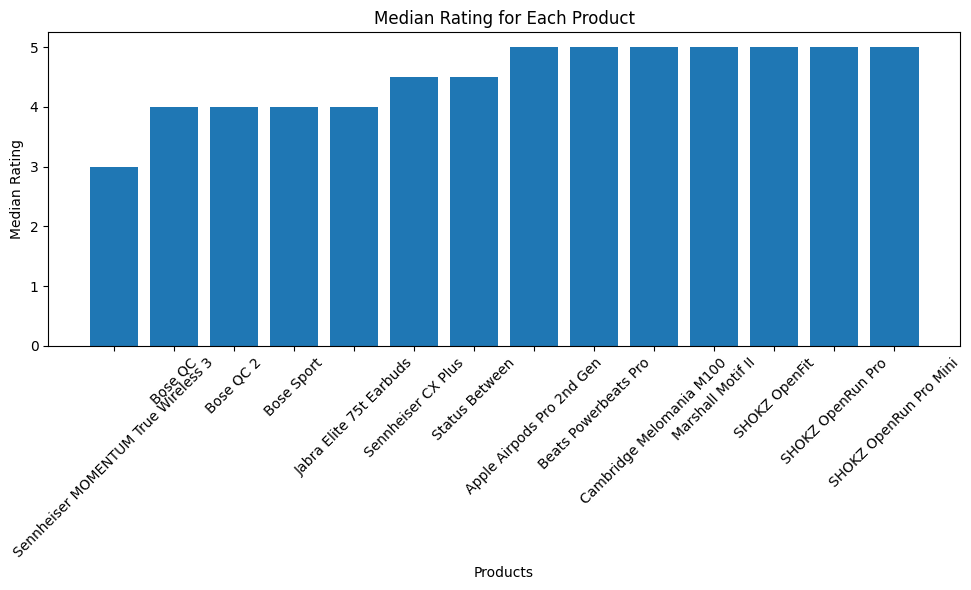

In [13]:
ratings_by_product_name = df.groupby('product_name').rating.median()

ratings_by_product_name.sort_values(inplace = True)
print(ratings_by_product_name)

x = ratings_by_product_name.index.tolist()
print(x)
y = ratings_by_product_name.values.tolist()

plt.figure(figsize = (10,6))
plt.xlabel('Products', wrap = True)
plt.ylabel('Median Rating')
plt.title('Median Rating for Each Product')
plt.bar(x,y)
plt.xticks(rotation = 45)
plt.tight_layout()

This graph reaveals that that the Powerbeats Pro's main competitiors are the SHOKZ OpenRun, Marhsall Motif II, Cambridge Melomania M100, and Apple Airpods Pro 2nd Gen.

What's the reason behind these high ratings? Is there any correlation between price and rating? Let's find out using correlation analysis

Covariance of ratings and prices: 1.7689009496768313
Correlation Coefficient of ratings and prices: 0.09078498584489851


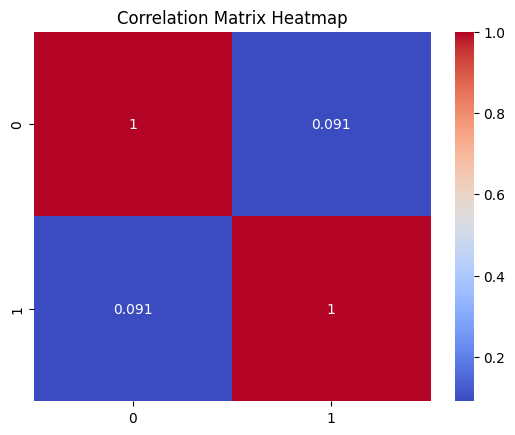

In [14]:
ratings = df['rating']
prices = df['price']

#Calculate covariance
cov_rp = ratings.cov(prices)
print(f"Covariance of ratings and prices: {cov_rp}")

#Calculate correlation coefficient
r = ratings.corr(prices)
print(f"Correlation Coefficient of ratings and prices: {r}")

#Visualize correlation with scatterplot
plt.scatter(ratings[:200], prices[:200])
plt.title('Prices vs Ratings')
plt.xlabel('Ratings')
plt.ylabel('Prices')

#Visualize correlation with heatmap
corr_matrix = np.corrcoef(ratings, prices)
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

Since the correlation coefficient is 0.09, there is a very weak correlation between ratings and prices. As a result, we can disregard price as a reason behind these customer ratings.

# Sentiment Analysis

## Methodology

In order to gather customer sentiment, I utilized the Python NLTK Valence Aware Dictionary for Sentiment Reasoning (VADER) model and TextBlob framework for ease of use of the model. This rule-based model splits text into words, assigns each word with a sentiment score, and calculates the overall sentiment score of the text.

Using the polarity scores the model returns, I can place each review into a Positive, Neutral, or Negative sentiment group.

In [15]:
import nltk
from textblob import TextBlob
from nltk.tokenize import word_tokenize
#Determine polarity scores for each customer review
nltk.download('vader_lexicon')
polarity_scores = []
sentiment_categories = []
content = df['content']
for c in content:
  textblob_obj = TextBlob(c)
  polarity = textblob_obj.sentiment.polarity
  polarity_scores.append(polarity)
  if polarity >= 0.5:
    sentiment_categories.append('Positive')
  elif polarity <= -0.2:
    sentiment_categories.append('Negative')
  else:
    sentiment_categories.append('Neutral')
df['polarity_score'] = polarity_scores
df['sentiment_category'] = sentiment_categories
df.info()
df

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   review_id           953 non-null    object 
 1   product_id          953 non-null    object 
 2   title               953 non-null    object 
 3   author              953 non-null    object 
 4   rating              953 non-null    int64  
 5   content             953 non-null    object 
 6   timestamp           953 non-null    object 
 7   profile_id          953 non-null    object 
 8   is_verified         953 non-null    bool   
 9   helpful_count       953 non-null    int64  
 10  product_attributes  953 non-null    object 
 11  product_name        953 non-null    object 
 12  price               953 non-null    float64
 13  polarity_score      953 non-null    float64
 14  sentiment_category  953 non-null    object 
dtypes: bool(1), float64(2), int64(2), object(10)
memory usage

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes,product_name,price,polarity_score,sentiment_category
0,R2W3M98YCJS6TL,B0BJQWYLYN,5.0 out of 5 stars Like-New Performance at a G...,Kurt,5,I recently purchased the Renewed Apple AirPods...,"Reviewed in the United States April 24, 2024",AFLOJ2Q3TJDSVBNLDOCR2L76JBWQ,True,5,Product grade: Renewed,Apple Airpods Pro 2nd Gen,180.0,0.422112,Neutral
1,R1KJP24LAF02NA,B0BJQWYLYN,5.0 out of 5 stars Like new!,Alejandra Ahumada,5,I recently purchased the refurbished Apple Air...,"Reviewed in the United States June 22, 2023",AGPV7FTN7ISCNEI23RS7XMGT2YZQ,True,36,Product grade: Renewed,Apple Airpods Pro 2nd Gen,180.0,0.377616,Neutral
2,RZAIZ89G2X3G8,B0BJQWYLYN,5.0 out of 5 stars In This Case Refurbished Ar...,F-Stop Fitzgerald,5,First off there is no difference between a new...,"Reviewed in the United States April 21, 2024",AGFKFVBWSW4W3SDF3542U55CGQYQ,True,8,Product grade: Renewed,Apple Airpods Pro 2nd Gen,180.0,0.212980,Neutral
3,R24IR2MZ35VQC4,B0BJQWYLYN,5.0 out of 5 stars Beyond amazing! Can’t belie...,Doovakin,5,*BUYER BEWARE: MINE CAME IN THE ORIGINAL BOX A...,"Reviewed in the United States March 11, 2023",AGYSZJ3UE7UC2KEXOZRPDDOG3GKA,True,37,Product grade: Renewed,Apple Airpods Pro 2nd Gen,180.0,0.161031,Neutral
4,R3OP7FU59NCVM7,B0BJQWYLYN,1.0 out of 5 stars A little disappointed,Amazon customer,1,Well they arrived in about 4 days from orderin...,"Reviewed in the United States January 12, 2023",AE55DAYJJ5GOV3PSHTZSHL7FCAWA,True,85,Product grade: Renewed,Apple Airpods Pro 2nd Gen,180.0,0.093820,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,R1SL3EFNN1CT5B,B07R5QD598,5.0 out of 5 stars Happy with this purchase,Amazon Customer,5,"Bought these to wear for my commute, walking, ...","Reviewed in the United States July 1, 2024",AFAF5O4DQPM4Y2YCKA65GRZSKREA,True,0,Color: BlackStyle: Powerbeats ProSet: Without ...,Beats Powerbeats Pro,200.0,0.422500,Neutral
949,R1RF62E6KLZPO1,B07R5QD598,4.0 out of 5 stars Hard to put in,Kim,4,These work well and they are definitely constr...,"Reviewed in the United States June 22, 2024",AHAQJ3Y7K22DTPMCY3RXPP44LRZA,True,0,Color: IvoryStyle: Powerbeats ProSet: Without ...,Beats Powerbeats Pro,200.0,-0.325000,Negative
950,R247P4C3C5EEXY,B07R5QD598,4.0 out of 5 stars Excellent Wireless Earbuds ...,Arnold,4,I don't know if Amazon will list how many time...,"Reviewed in the United States February 9, 2024",AEXTQVIKQK72BB6WPCVVUX73H3KQ,True,0,Color: NavyStyle: Powerbeats ProSet: Without A...,Beats Powerbeats Pro,200.0,0.228610,Neutral
951,R1JMOFHE7BHYZZ,B07R5QD598,5.0 out of 5 stars Great Product,Backplate,5,Best Wireless Headphones Out On The Market,"Reviewed in the United States July 13, 2024",AGRDG454JH77PBNLB4I73FHNY3EQ,True,0,Color: BlackStyle: Powerbeats ProSet: With App...,Beats Powerbeats Pro,200.0,1.000000,Positive


## Results

Let's compare consumer polarity distribution between Beats and its competitors.

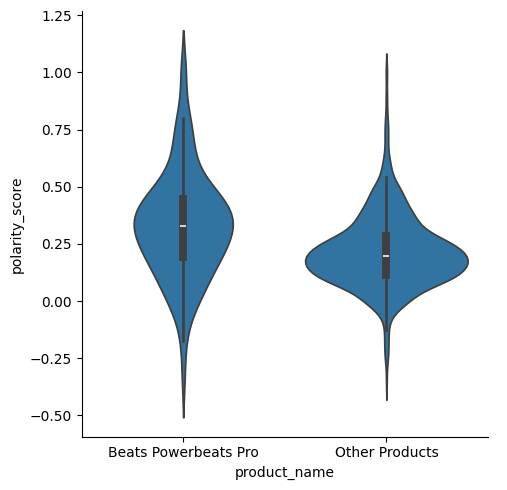

In [16]:
beats_polarity = df.loc[df.product_name == 'Beats Powerbeats Pro', ['product_name','polarity_score']]
other_products_polarity = df.loc[df.product_name != 'Beats Powerbeats Pro', ['product_name','polarity_score']]
other_products_polarity['product_name'] = 'Other Products'
polarity_df = pd.concat([beats_polarity, other_products_polarity], axis = 0)
sns.catplot(x = "product_name", y = "polarity_score", kind = 'violin', data = polarity_df)

It's clear that the Powerbeats Pro has a higher polarity score and more diverse polarity scores, with a normal curve distribution, compared to its competitors. The Powerbeats Pro also has the highest and lowest polarity scores for its reviews.

What about the sentiment category? What products make up the most of the Positive category? Let's find out using a pie chart to find the percentage of the Positive sentiment category that each product takes up.

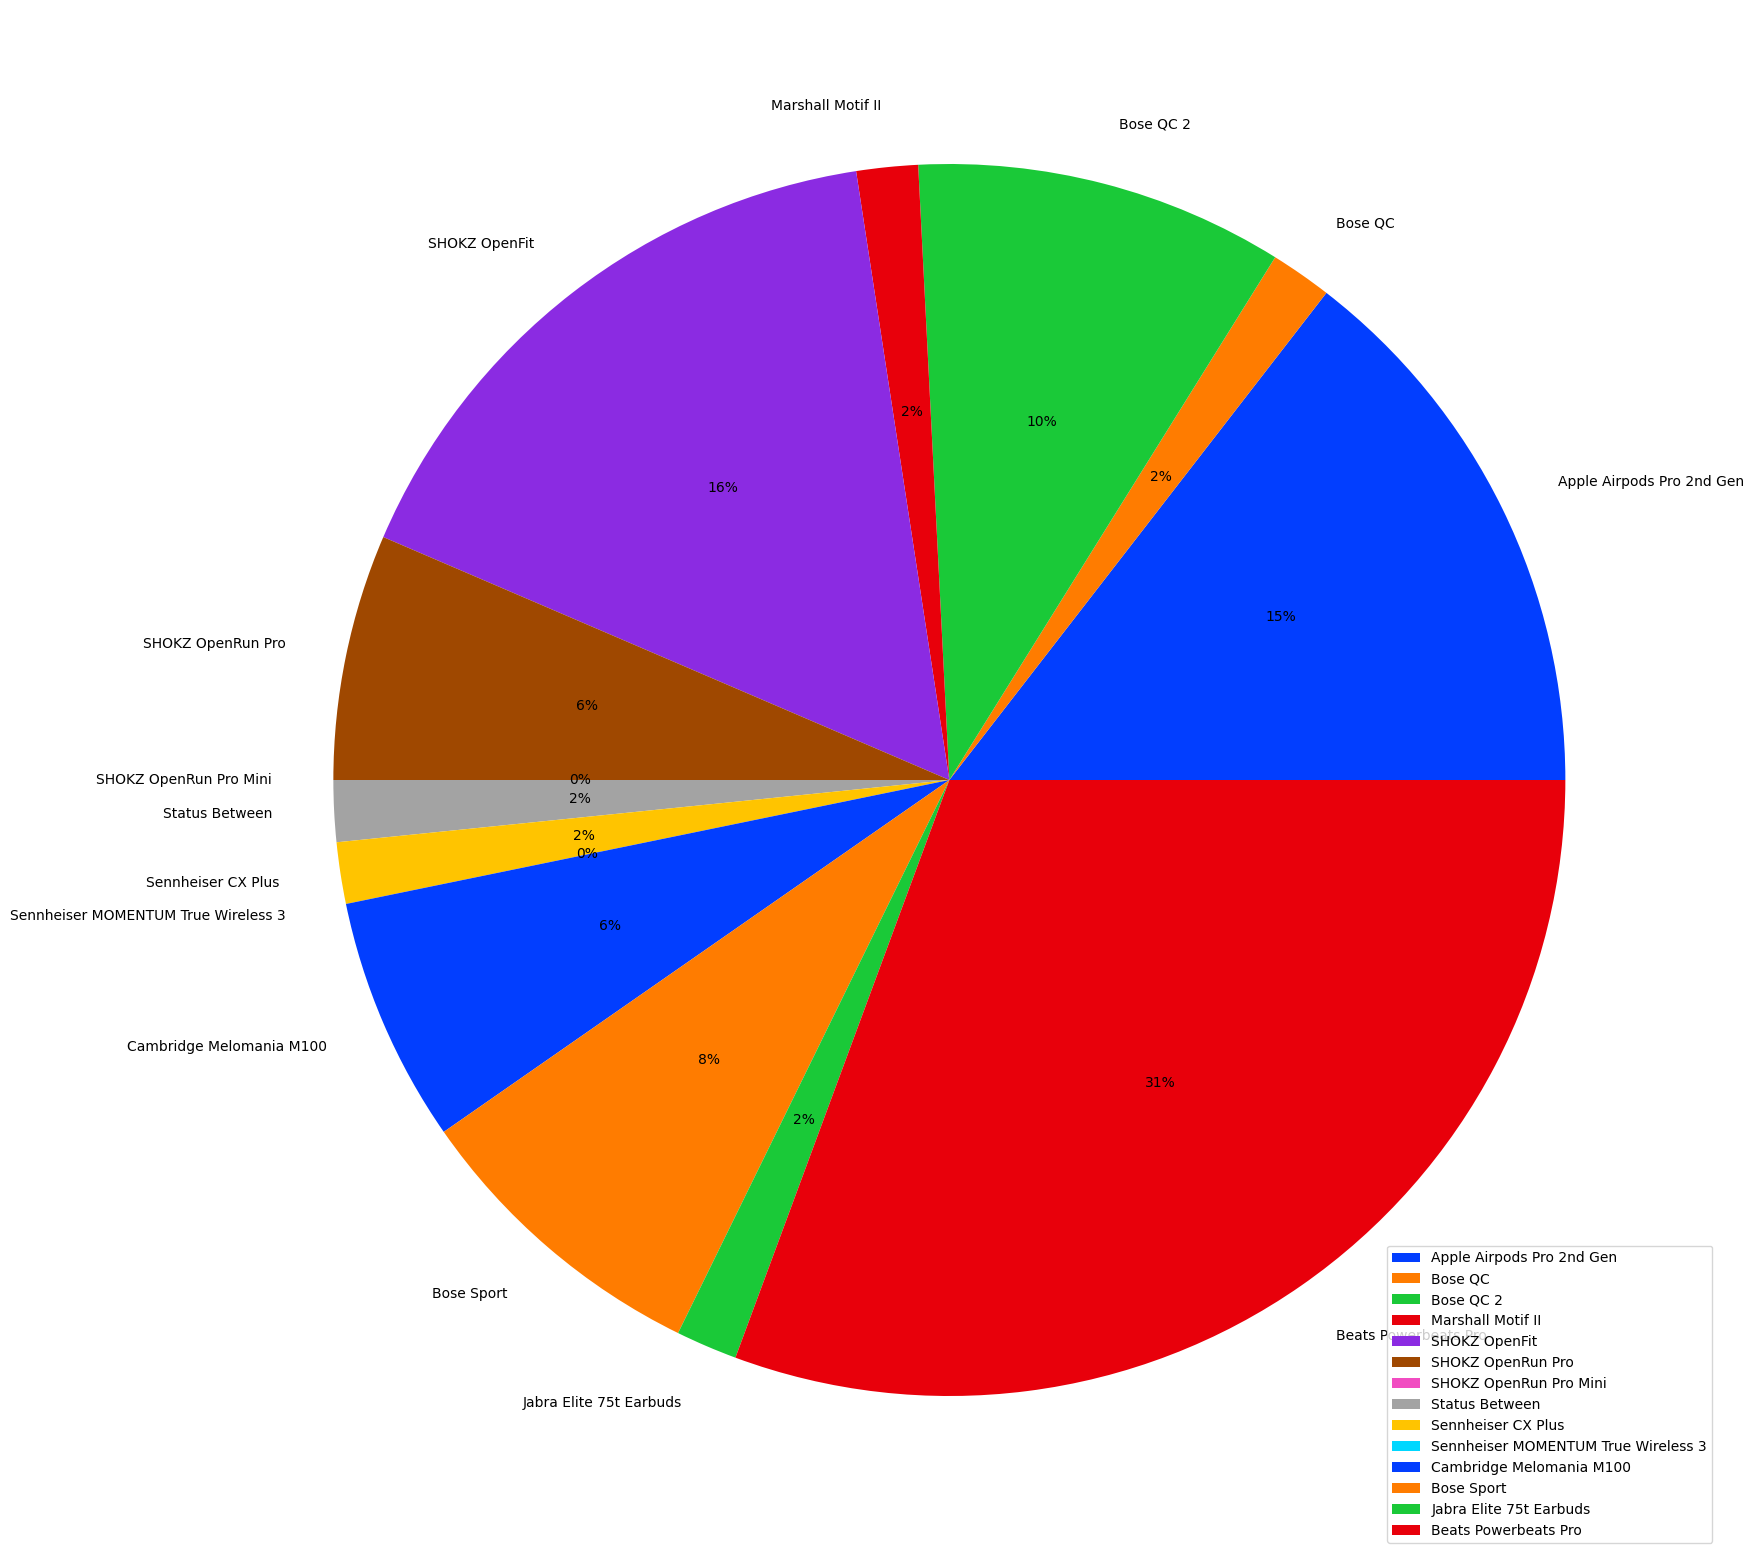

In [17]:
positive_category = df.groupby('sentiment_category').get_group('Positive')
products = df['product_name'].unique()
positive_distribution = []
for p in products:
  count = len(positive_category.loc[positive_category.product_name == p])
  positive_distribution.append(count)
plt.figure(figsize = (20, 20))
palette_color = sns.color_palette('bright')
plt.pie(positive_distribution, labels = products, colors = palette_color, autopct='%.0f%%')
plt.legend(labels=products, loc='lower right')

Let's dive deeper by finding out what do people like about the Powerbeats Pro by going through the Positive sentiment category and displaying the most relevant words using Word Cloud.

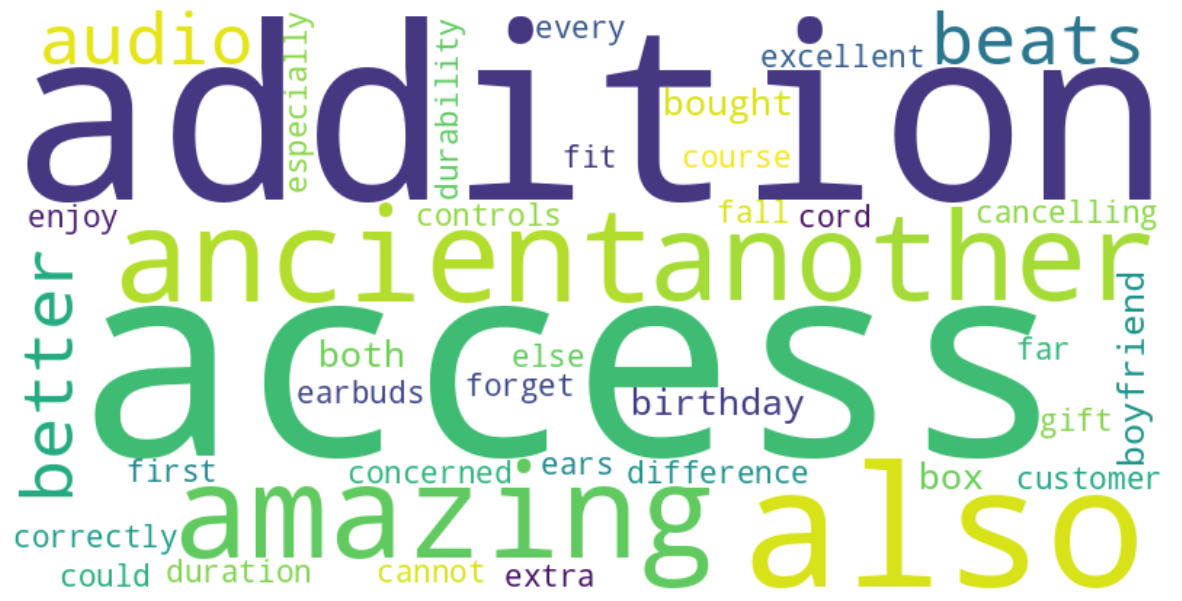

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS
import re

whitelist = set('abcdefghijklmnopqrstuvwxyz ABCDEFGHIJKLMNOPQRSTUVWXYZ.,\'')
corpus = positive_category.loc[positive_category.product_name == 'Beats Powerbeats Pro']['content'].tolist()
for i in range(len(corpus)):
  corpus[i] = ''.join(filter(whitelist.__contains__, corpus[i]))# FIlter out all numbers from each review. We only want words to show in our word cloud.

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(corpus)
tfidf_scores = dict(zip(tfidf.get_feature_names_out(), tfidf.idf_))

wordcloud = WordCloud(width = 800, height = 400, background_color = 'white', colormap = 'viridis', max_words = 40, collocations=False, stopwords = STOPWORDS)
wordcloud.generate_from_frequencies(tfidf_scores)

plt.figure(figsize = (15, 15))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

Based off these reviews, it seems that customers enjoy the 12-15 hours of battery life, the audio quality, durability, fit, easy controls, and noise-cancelling. People describe the Powerbeats Pro as excellent and make great birthday gifts or as presents to important men in their lives. Of course, there are odd words, such as ancient, cord, ears, and especially, but these can be ignored for the sake of answering our question.

But what makes a bad product? Let's look at the Negative sentiment category for all products and display it using WordCloud again.

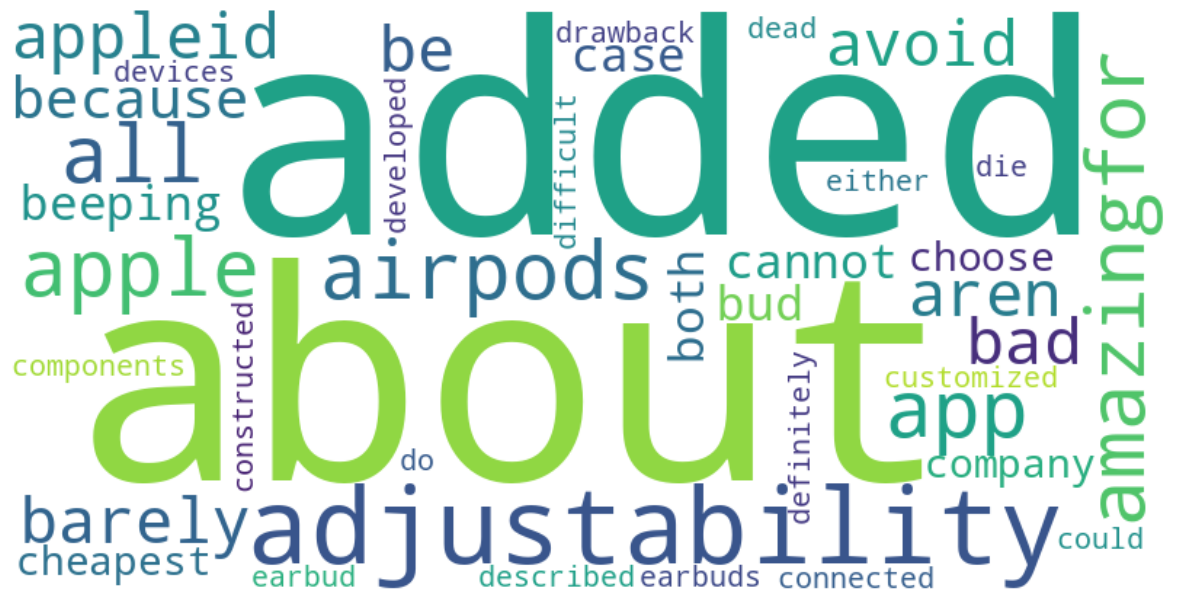

In [19]:
negative_category = df.groupby('sentiment_category').get_group('Negative')
corpus = negative_category['content'].tolist()
for i in range(len(corpus)):
  corpus[i] = ''.join(filter(whitelist.__contains__, corpus[i]))# FIlter out all numbers from each review. We only want words to show in our word cloud.

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(corpus)
tfidf_scores = dict(zip(tfidf.get_feature_names_out(), tfidf.idf_))

wordcloud = WordCloud(width = 800, height = 400, background_color = 'white', colormap = 'viridis', max_words = 40, collocations=False, stopwords = STOPWORDS)
wordcloud.generate_from_frequencies(tfidf_scores)

plt.figure(figsize = (15, 15))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

# It seems that bad in-ear headphones hav epoor adjustability, cheap components, die quickly, and beep.

It seems that bad in-ear headphones have poor adjustability, cheap components, die quickly, and beep.

# AI-Generated Insights

## Using Gemini AI

1. Engineer prompts to explain to Gemini what specific information I'm looking for.
2. Combine prompts with list of reviews I wish to analyze
3. Send the prompt to Gemini AI using an API key
4. Display Gemini AI's response

Create a method to send in a prompt to Gemini AI and return a response

In [22]:
import google.generativeai as genai

GEMINI_API_KEY = "YOUR API KEY"

def analyze_reviews(prompt, api_key):
  genai.configure(api_key = api_key)

  model = genai.GenerativeModel(
      model_name = "gemini-1.5-flash",
      generation_config = {
          "temperature" : 1,
          "top_p" : 0.95,
          "top_k" : 64,
          "max_output_tokens" : 8192,
          "response_mime_type" : "text/plain",
      },
  )

  chat_session = model.start_chat(history = [])

  response = chat_session.send_message(prompt)
  return response.text

## Key Insights

Focusing on the Powerbeats Pro, here are some questions Gemini AI can help us answer:

- What are the top 5 pain points consumers face?
- What are the top 5 features consumers love?
- What are the unique selling points of the Powerbeats Pro compared to other products?
- What are the top 5 surprising use cases for the Powerbeats Pro?

- What are unique features of other products that could improve the Powerbeats Pro?

In [23]:
reviews = df.loc[df.product_name == "Beats Powerbeats Pro", "content"].tolist()
prompt = f"""Based off the following reviews of the Beats Powerbeats Pro, what are the top 5 pain points consumers face?:
\n
{reviews}"""

response = analyze_reviews(prompt, GEMINI_API_KEY)
print(response)

Based on the reviews, here are the top 5 pain points consumers face with the Beats Powerbeats Pro:

1. **Charging Case Issues:**  Many reviewers report problems with the charging case, including:
    * **Earbuds not charging properly:** This can be due to the earbuds not sitting correctly in the case, faulty contacts, or the case itself losing charge capacity over time.
    * **Earbuds randomly disconnecting while in the case:** This can lead to dead earbuds when you think they're charging.
    * **Bulky size:** The case is considered too large for many users, making it inconvenient to carry around. 
2. **Bluetooth Connectivity Issues:** 
    * **Intermittent disconnections:** Users experience frequent drops in connectivity, especially during movement or in certain environments. 
    * **Synchronization issues:** Left and right earbuds going out of sync, resulting in echo or delay.
    * **Difficulty connecting to specific devices:**  Some users report issues pairing with certain Andro

In [24]:
reviews = df.loc[df.product_name == "Beats Powerbeats Pro", "content"].tolist()
prompt = f"""Based off the following reviews of the Beats Powerbeats Pro, what are the top 5 features consumers love?:
\n
{reviews}"""

response = analyze_reviews(prompt, GEMINI_API_KEY)
print(response)

Based on the reviews, here are the top 5 features consumers love about the Beats Powerbeats Pro:

1. **Secure Fit:**  The most common praise is for the secure fit, especially during exercise.  Many reviewers highlight the ear hooks as the key to keeping the earbuds in place even during intense workouts, running, and other physical activities. 
2. **Sound Quality:** While some found the bass to be lacking, many reviewers enjoyed the overall sound quality, particularly the clear highs and satisfying bass. 
3. **Battery Life:**  The Powerbeats Pro's 9-hour battery life (with an additional 24 hours from the case) is consistently lauded as excellent. 
4. **Convenience and Seamless Connectivity:**  Users appreciate the fast and reliable pairing, especially with Apple devices, and the ease of use with features like automatic pausing when earbuds are removed and Siri integration. 
5. **Durability:** Several reviewers mention the Powerbeats Pro's resilience, even after being subjected to harsh 

In [25]:
beats_reviews = df.loc[df.product_name == "Beats Powerbeats Pro", "content"].tolist()
reviews = df.loc[df.product_name != "Beats Powerbeats Pro", "content"].tolist()
prompt = f"""Based off the following reviews of the Beats Powerbeats Pro, what are the unique selling points of the Powerbeats Pro compared to other products?:
\n
Here are the reviews for the Beats Powerbeats Pro:
{beats_reviews}
\n
Here are the reviews for other products:
{reviews}"""

response = analyze_reviews(prompt, GEMINI_API_KEY)
print(response)

Based on the reviews, here are the unique selling points of the Beats Powerbeats Pro compared to other products:

**Strong Points:**

* **Secure Fit:**  Powerbeats Pro are consistently praised for their secure fit, especially during workouts and active lifestyles. The ear hooks are designed to stay put, even with vigorous movement, making them a popular choice for runners and gym goers.
* **Battery Life:** The Powerbeats Pro offer a long battery life of 9 hours, and the case provides an additional 24 hours. This long battery life is considered one of their key advantages, especially for frequent users.
* **Sound Quality:** While some reviewers found the sound a bit bass-heavy, many found the sound quality to be excellent, with a satisfying amount of bass that isn't overwhelming.
* **Apple Integration:**  The Powerbeats Pro connect seamlessly with Apple devices, offering features like Siri integration and battery status display on the iPhone. 

**Powerbeats Pro Are Often Compared To:**


In [26]:
reviews = df.loc[df.product_name == "Beats Powerbeats Pro", "content"].tolist()
prompt = f"""Based off the following reviews of the Beats Powerbeats Pro, what are the top 5 surprising things customers use the Powerbeats Pro for?:
\n
{reviews}"""

response = analyze_reviews(prompt, GEMINI_API_KEY)
print(response)

Based on the reviews, here are the top 5 surprising things customers use Beats Powerbeats Pro for, along with the reasons why they're surprising:

1. **Sleeping:**  While not designed for sleep, some users find them comfortable enough to wear while lying down, especially for podcasts. This is surprising because the ear hooks and in-ear fit are usually associated with active use. 
2. **Household Chores:** Several reviews mention using the Powerbeats Pro for chores like cutting the lawn, vacuuming, and cleaning. This is surprising because these earbuds are marketed primarily for workouts and sports. 
3. **Long Work Shifts:** A few users report wearing them for extended periods at a desk job. This is surprising because the tight fit and ear hooks could lead to discomfort over longer periods.
4. **Taking Phone Calls:**  Many users praise the microphone quality and convenience of answering calls with the earbuds, making them a hands-free solution. This is surprising because the focus on spo

In [27]:
beats_reviews = df.loc[df.product_name == "Beats Powerbeats Pro", "content"].tolist()
reviews = df.loc[df.product_name != "Beats Powerbeats Pro", "content"].tolist()
prompt = f"""Based off the following reviews, what are unique features other products have that could improve the Beats Powerbeats Pro?:
\n
Here are the reviews for the Beats Powerbeats Pro:
{beats_reviews}
\n
Here are the reviews for other products:
{reviews}"""

response = analyze_reviews(prompt, GEMINI_API_KEY)
print(response)

Based on the reviews, here are some unique features from other products that could improve the Beats Powerbeats Pro:

**Sound Quality:**

* **More Balanced Sound:** Several reviewers note that the Powerbeats Pro can sound a bit "tinny" or lack balanced sound.  Products like the Bose QuietComfort Earbuds, Sony WF-1000XM4, and Sennheiser Momentum True Wireless 3 are praised for their more balanced sound profiles.
* **Customizable EQ:** Some products like the Bose QuietComfort Earbuds and Sony WF-1000XM4 offer more detailed EQ control in their companion apps, allowing users to fine-tune the sound to their preferences. The Powerbeats Pro app is limited in this area. 
* **Hi-Res Audio Support:** While not all users prioritize it, some products like the Sony WF-1000XM4 and Sennheiser Momentum True Wireless 3 support higher-resolution audio codecs (LDAC, aptX HD) that deliver a richer audio experience when paired with compatible devices.

**Fit and Comfort:**

* **Better Ear Tip Options:** Th

## Interpretation

Customers have mixed experiences when it comes to the Powerbeats Pro, despite most of them being positive. Negative experiences are often related to the charging case, connectivity, comfort, and sound quality. Customers are also using these earphones for surprising reasons such as sleep, cleaning, phone calls, house chores, and traveling, despite them being advertised to be used for fitness.

The main advantages of the Powerbeats Pro are its secure fit, battery life, and charging time, but may need improvements in audio quality, case size, and active noise-cancellation.

# Comparative Analysis

## Competitor Overview

- Apple Airpods Pro 2nd Gen (Apple)
- Bose QuietComfort Earbuds (Bose)
- Bose QuietComfort Earbuds 2 (Bose)
- Bose Sport Earbuds (Bose)
- Marshall Motif II'(Marshall)
- SHOKZ OpenFit (SHOKZ)
- SHOKZ OpenRun Pro (SHOKZ)
- SHOKZ OpenRun Pro Mini (SHOKZ)
- Status Between (Status)
- Sennheiser CX Plus (Sennheiser)
- Sennheiser MOMENTUM True Wireless 3 (Sennheiser)
- Cambridge Melomania M100 (Cambridge)
- Jabra Elite 75t Earbuds (Jabra)

## Market Share
- Apple dominates the wireless headphones/earphones market at 34.4%
- Beats runs 2nd at 15.3%
- Bose with 12.5%
- Sony with 11.4%

https://www.statista.com/chart/26791/most-popular-headphone-brands-in-the-us/

## Comparison of Sentiments

product_name
Bose Sport                             0.162630
Sennheiser MOMENTUM True Wireless 3    0.165351
Bose QC                                0.171363
SHOKZ OpenRun Pro Mini                 0.175042
Bose QC 2                              0.180533
Jabra Elite 75t Earbuds                0.182692
Status Between                         0.191202
SHOKZ OpenRun Pro                      0.215199
Sennheiser CX Plus                     0.220257
Apple Airpods Pro 2nd Gen              0.233698
Marshall Motif II                      0.243324
SHOKZ OpenFit                          0.246792
Cambridge Melomania M100               0.278571
Beats Powerbeats Pro                   0.328626
Name: polarity_score, dtype: float64


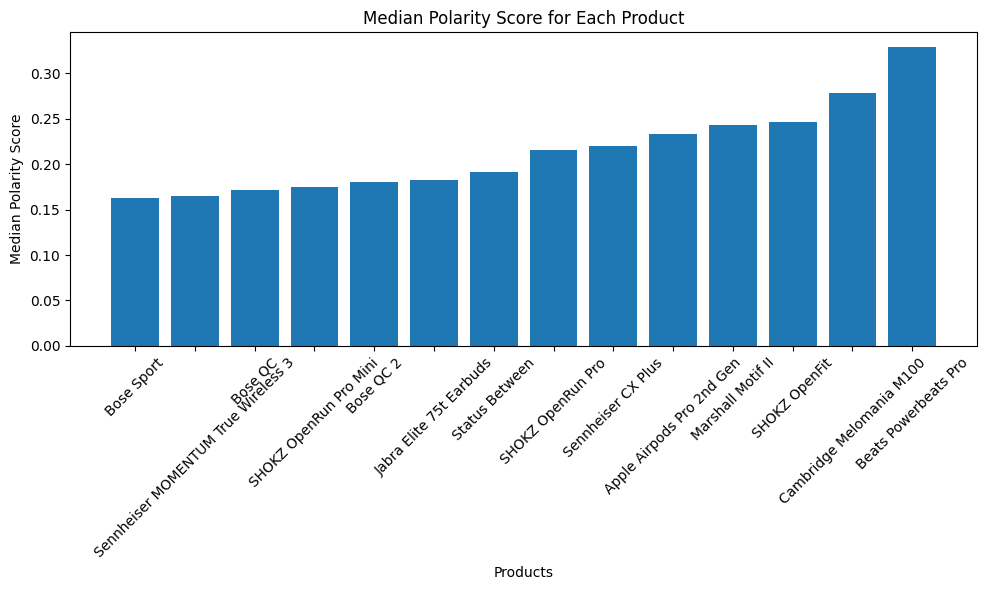

In [28]:
polarity_scores_by_product_names = df.groupby('product_name').polarity_score.median()

polarity_scores_by_product_names.sort_values(inplace = True)
print(polarity_scores_by_product_names)

x = polarity_scores_by_product_names.index.tolist()
y = polarity_scores_by_product_names.values.tolist()

plt.figure(figsize = (10, 6))
plt.xlabel('Products')
plt.ylabel('Median Polarity Score')
plt.title('Median Polarity Score for Each Product')
plt.bar(x, y)
plt.xticks(rotation = 45)
plt.tight_layout()

Although all products have median polarity scores that would be categorized as "Neutral", the Powerbeats Pro has the highest sentiment score. This means that the expected review of the Powerbeats Pro is more positive than expected reviews from other individual products.

## SWOT (Strengths, Weaknesses, Opportunities, and Threats) Analysis of the Powerbeats Pro

### Strengths:
- Secure fit
- Sound Quality
- Battery Life
- Ease of use and connectivity (mainly with Apple products)
- Durability & sweat/water resistance

### Weaknesses:

- Bulky case that's difficult to carry in your pocket and may inconsistently charge each earbud
- Connectivity glitches for Android devices
- Discomfort after prolonged use or those with smaller ears
- Lack of features such as no active noise-cancellation or "Find My" functionality

### Opportunites:

- Global Music Streaming Market size was valued at USD 33.78 billion in 2022 and is poised to grow from USD 38.75 Billion in 2023 to USD 116.07 billion by 2031 (https://www.skyquestt.com/report/music-streaming-market#:~:text=Global%20Music%20Streaming%20Market%20size,period%20(2024%2D2031))
- Apple Podcasts hosts 2,697,376 podcasts as of June 2024, which is up from 2,332,900 (+13.5%) in September 2021 (https://www.thepodcasthost.com/listening/podcast-industry-stats/)
- The fitness industry is growing at a rate of approximately 8.7% per year, with a projected market value of $96.6 billion by 2024 (https://wexer.com/blog/2024-fitness-industry-trends-driving-growth/#:~:text=The%20fitness%20industry%20is%20growing,reach%20230%20million%20by%202023.)
- Global smartphone shipments increased 6.5% year over year to 285.4 million units in the second quarter of 2024 (2Q24). (https://www.idc.com/getdoc.jsp?containerId=prUS52436724#:~:text=NEEDHAM%2C%20Mass.%2C%20July%2015,quarter%20of%202024%20(2Q24))

### Threats:

- As of early 2024, Android has a 70.69% market share worldwide. Android smartphones accounted for 56% of all smartphone sales worldwide in Q4 2023. (https://backlinko.com/iphone-vs-android-statistics#:~:text=vs%20iOS%20(iPhone)-,iPhone%20vs%20Android%20Stats%20(Highlights),sales%20worldwide%20in%20Q4%202023.)
- The global bone conduction headphones (such as SHOKZ) market size is anticipated to be worth USD 653.5 million in 2021 and is projected to touch USD 5792.92 million by 2031 with a CAGR of 24.4% during the forecast period.(https://www.businessresearchinsights.com/market-reports/bone-conduction-headphones-market-100857)

# Strategic Recommendations

## Product Improvements

### Comfort
- Adjustable & softer ear hook for more comfortable fitting
  - The tight, secure fit is a benefit for those performing high-movement activities, however, prolonged use causes discomfort
  - The current fit may not be suitable for those with smaller ears
- Smaller case
  - Many users find the charging case bulky and inconvenient to carry in pockets

### Audio Quality
- Transparency mode & Active Noise-Cancelling
  - Gym goers have issue hearing their music over the loud music their gyms play and often have to turn the volume up to max. This is unhealthy for long-term usage.
- Better Bass
  - Users want equalizer app with lots of control
- Better Highs
 - Some reviewers found the highs "tinny" or lacking clarity

### Battery & Charging
- Reduce battery degradation
  - Users found battery life declining significantly after a year or two
  - Some users report the case not holding a full charge for advertised times or draining quickly
- More secure fitting of earbuds in the case
  - Earbuds may not connect to the case properly, leading to inconsistent charging and even draining of the earbuds while in the case
- Battery indicator on charging case
  - This would help users track the case's battery life
- Improve durability of charging port
  - Charging port becoming faulty or corroded, impacting charging
- Switch to USB-C port

### Connectivity
- Add ability to install software updates through apps
  - Reviews consistently point to the need for more frequent and effective software updates to address common issues like connectivity problems
- Improve audio syncing
  - Sound cutting in and out intermittently
  - Left and right earbuds getting out of sync, creating an echo effect
  - Only one earbud connecting, making it impossible to use both
- Better connection for Android devices
 - Those with connectivity issues are typically from those with Android devices

### Functionality/Features

- "Find My" Feature
  - A "Find My" feature like that found on AirPods Pro could help users locate misplaced earbuds
- Multi-Device Connection
  - Many users find it frustrating that the Powerbeats Pro can only connect to one device at a time

## Marketing Strategies

Even though the Powerbeats Pro is marketed as earphones geared towards those with active lifestyles, there are also other surprising audiences Beats can push advertisements towards:

- Travelers / Those with long commutes
  - Several reviewers mentioned using them for extended flights or long road trips, highlighting the long battery life and secure fit
  - The noise isolation and battery life are appreciated for commuting and travel, especially on planes or noisy public transport
- Remote workers or Customer service agents
 - Reviewers praise the microphone quality for making calls, both during workouts and everyday use
- Those with sleep issues
  -  While not designed for sleeping, a few reviewers mentioned using them while lying down, even though the earhooks might be uncomfortable for side sleepers.
- Maids / People who complete chores often
   - Several customers found them useful for staying hands-free while doing chores like cutting the lawn, vacuuming, or cleaning the house
   - Users found text-to-speech notifications very helpful
  


## Future Research
* **Research:** Analyze how ear size and shape correlate with user experience, especially comfort and secure fit. This could involve understanding which ear tip sizes are most effective for different ear shapes and sizes.
  -  Collect detailed data on ear size and shape from a larger, more diverse sample of users. This could be done through surveys, 3D ear scans, or even fitting trials with different earbud models.

* **Research:** Investigate potential causes of connectivity issues, such as Bluetooth interference, device compatibility, and software bugs. Look for patterns in the data to determine if the issues are widespread or related to specific user behaviors or environments.
  * **Data Collection:**  Collect detailed logs of Bluetooth connection issues, including the specific nature of the problem, the environment, and the connected devices.


* **Research:** Compare actual battery life against advertised claims. Investigate potential factors affecting battery
  * **Data Collection:** Track battery life under various usage scenarios, including continuous play, intermittent use, and different volume levels.


* **Research:** Compare sound quality objectively using audio analysis tools. Investigate the impact of different ear tip sizes and fit on sound perception.
  * **Data Collection:**  Gather user feedback on the specific qualities of the sound, such as bass response, clarity, treble accuracy, and soundstage. Use standardized tests and subjective listening evaluations.


* **Research:** Conduct accelerated wear and tear testing to evaluate the durability of the earbuds and charging case. Investigate the impact of environmental factors like heat, moisture, and dust on performance.
  * **Data Collection:** Track the lifespan of the earbuds and identify common failure points.





# Conclusion

The Powerbeats Pro is a popular earphones choice for consumers, and through EDA and Sneitment Analysis, we were able to answer our 2 main questions:

- How popular are the Beats Powerbeats Pro in comparison to its competitors?
- What features of the Powerbeats Pro cause consumers to choose it over other earphones?

With its secure fit, incredibly durable design, and excellent audio quality (as found in our WordClouds), it has secured a top spot in both star rating as well as median polarity score. 62% of the Powerbeats Pro's ratings are 5-stars, the median rating for the Powerbeats Pro, while 47.5% of the aggregate competitor products' ratings are 5-stars. Beats also makes up 31% of the Positive sentiment category. These metrics demonstrate that consumers prefer the Powerbeats Pro over other products.

Next, through the use of AI we were able to extract more specific information about the product. We uncovered that besides the gym and other high-movement activities, users also use the Powerbeats Pro for sleep, chores, and travel. However, its success is not without its flaws, as the Powerbeats Pro also has issues with portability, connectivity, battery degradation, and lack of useful features.

Through product research into ear size and shape to maximize comfort, how ear tip size affects sound quality, factors that affect battery life, and environmental factors that affect wear and tear, Beats by Dr Dre will be able to make significant improvements to the Powerbeats Pro.

With sentiment analysis, we were not only able to identify research strategies and specific improvements for the product, but also uncover hidden audiences that the Powerbeats Pro benefits, thus changing marketing strategies.

The Powerbeats Pro is an incredible product, but through EDA and Sentiment Analalysis, Beats by Dr Dre can transform it into a memorable one.

# References

## Tools
- NLTK and TextBlob (Python libraries used for sentiment analysis)
- Matplotlib & Seaborn (Python data visualization libraries)
- Pandas and Numpy (Python libraries used for data cleansing, organization, and manipulation)
- Gemini AI (Google's Generative AI model used to generate insights from customer reviews)

## Sources
- https://www.google.com/url?q=https%3A%2F%2Fwww.statista.com%2Fchart%2F26791%2Fmost-popular-headphone-brands-in-the-us%2F
- https://www.google.com/url?q=https%3A%2F%2Fwww.skyquestt.com%2Freport%2Fmusic-streaming-market%23%3A%7E%3Atext%3DGlobal%2520Music%2520Streaming%2520Market%2520size%2Cperiod%2520%282024%252D2031%29
- https://www.google.com/url?q=https%3A%2F%2Fwww.thepodcasthost.com%2Flistening%2Fpodcast-industry-stats%2F
- https://www.google.com/url?q=https%3A%2F%2Fwexer.com%2Fblog%2F2024-fitness-industry-trends-driving-growth%2F%23%3A%7E%3Atext%3DThe%2520fitness%2520industry%2520is%2520growing%2Creach%2520230%2520million%2520by%25202023
- https://www.google.com/url?q=https%3A%2F%2Fwww.idc.com%2Fgetdoc.jsp%3FcontainerId%3DprUS52436724%23%3A%7E%3Atext%3DNEEDHAM%252C%2520Mass.%252C%2520July%252015%2Cquarter%2520of%25202024%2520%282Q24%29
- https://www.google.com/url?q=https%3A%2F%2Fbacklinko.com%2Fiphone-vs-android-statistics%23%3A%7E%3Atext%3Dvs%2520iOS%2520%28iPhone%29-%2CiPhone%2520vs%2520Android%2520Stats%2520%28Highlights%29%2Csales%2520worldwide%2520in%2520Q4%25202023
- https://www.google.com/url?q=https%3A%2F%2Fwww.businessresearchinsights.com%2Fmarket-reports%2Fbone-conduction-headphones-market-100857
